In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [6]:
filename='play_tennis.csv'
data=pd.read_csv(filename)

In [7]:
data

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.shape

(14, 6)

In [10]:
data.columns

Index(['day', 'outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')

In [12]:
data.describe()

,day,outlook,temp,humidity,wind,play
count,14,14,14,14,14,14
unique,14,3,3,2,2,2
top,D1,Sunny,Mild,High,Weak,Yes
freq,1,5,6,7,8,9


In [15]:
for column in data.columns:
    print(f"Number of null values in {column}:{data[column].isnull().sum()}")

Number of null values in day:0
Number of null values in outlook:0
Number of null values in temp:0
Number of null values in humidity:0
Number of null values in wind:0
Number of null values in play:0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     object
 5   play      14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes


In [21]:
data['temp'].isnull().sum()

0

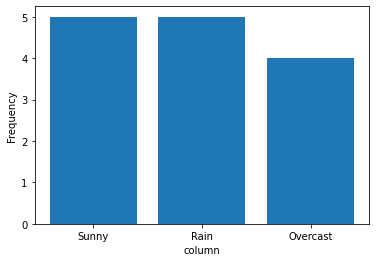

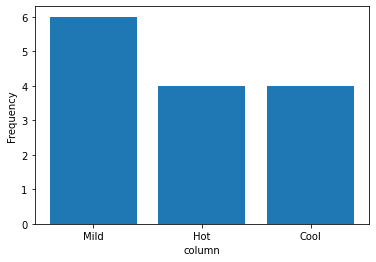

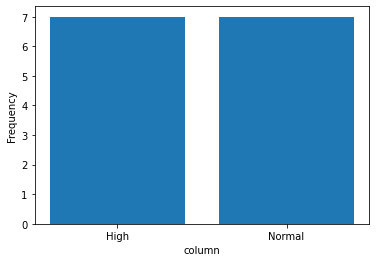

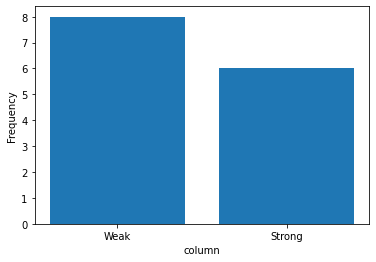

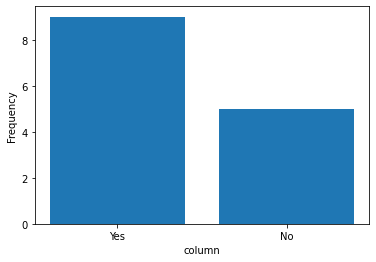

In [29]:
for column in data.columns:
    if column!='day':
        fig,ax=plt.subplots()
        ax.bar(data[column].value_counts().index,data[column].value_counts().values)
        ax.set_xlabel('column')
        ax.set_ylabel('Frequency')
        plt.show()
        

In [34]:
data['temp'].value_counts().index

Index(['Mild', 'Hot', 'Cool'], dtype='object')

In [36]:
data['temp'].value_counts().values

array([6, 4, 4])

In [37]:
data["play"].unique()

array(['No', 'Yes'], dtype=object)

In [38]:
data["temp"].unique()

array(['Hot', 'Mild', 'Cool'], dtype=object)

In [42]:
data["temp"]

0      Hot
1      Hot
2      Hot
3     Mild
4     Cool
5     Cool
6     Cool
7     Mild
8     Cool
9     Mild
10    Mild
11    Mild
12     Hot
13    Mild
Name: temp, dtype: object

In [52]:
p=data["outlook"]
p[:5]


0       Sunny
1       Sunny
2    Overcast
3        Rain
4        Rain
Name: outlook, dtype: object

In [53]:
data["outlook"]

0        Sunny
1        Sunny
2     Overcast
3         Rain
4         Rain
5         Rain
6     Overcast
7        Sunny
8        Sunny
9         Rain
10       Sunny
11    Overcast
12    Overcast
13        Rain
Name: outlook, dtype: object

In [56]:
data["outlook"].unique()

array(['Sunny', 'Overcast', 'Rain'], dtype=object)

In [58]:
outlook_map={'Sunny':0,'Overcast':1,'Rain':2}

In [66]:
data['temp'].unique()

array(['Hot', 'Mild', 'Cool'], dtype=object)

In [81]:
data['humidity'].unique()

array(['High', 'Normal'], dtype=object)

In [82]:
data["wind"].unique()

array(['Weak', 'Strong'], dtype=object)

In [83]:
temp_map={'Hot':0,'Mild':1,'Cool':2}
humidity_map={'High':0,'Normal':1}
wind_map={'Weak':0,'Strong':1}
play_map={'No':0,'Yes':1}

In [86]:
data['outlook']=data['outlook'].replace(outlook_map)
data['temp']=data['temp'].replace(temp_map)
data['humidity']=data['humidity'].replace(humidity_map)
data['wind']=data['wind'].replace(wind_map)
data['play']=data['play'].replace(play_map)

In [87]:
data

,day,outlook,temp,humidity,wind,play
0,D1,0,0,0,0,0
1,D2,0,0,0,1,0
2,D3,1,0,0,0,1
3,D4,2,1,0,0,1
4,D5,2,2,1,0,1
5,D6,2,2,1,1,0
6,D7,1,2,1,1,1
7,D8,0,1,0,0,0
8,D9,0,2,1,0,1
9,D10,2,1,1,0,1


In [90]:
print("outlook:",data["outlook"].unique())
print("temp:",data["temp"].unique())
print("humidity:",data["humidity"].unique())
print("wind:",data["wind"].unique())

outlook: [0 1 2]
temp: [0 1 2]
humidity: [0 1]
wind: [0 1]


In [92]:
X=data[['outlook','temp','humidity','wind']]
y=data['play']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [95]:
print(type(X_train),X_train.shape)
print(type(X_test),X_test.shape)

print(type(y_train),y_train.shape)
print(type(y_test),y_test.shape)

<class 'pandas.core.frame.DataFrame'> (11, 4)
<class 'pandas.core.frame.DataFrame'> (3, 4)
<class 'pandas.core.series.Series'> (11,)
<class 'pandas.core.series.Series'> (3,)


In [102]:
DTC_Model=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=10)
DTC_Model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [104]:
DTC_Model.score(X_train,y_train)

1.0

In [112]:
X_test

,outlook,temp,humidity,wind
8,0,2,1,0
6,1,2,1,1
4,2,2,1,0


In [114]:
y_pred=DTC_Model.predict(X_test)
y_pred

array([1, 1, 1])

In [116]:
print(y_pred)

[1 1 1]


In [118]:
print(y_test)

8    1
6    1
4    1
Name: play, dtype: int64


In [121]:
DTC_Model.score(X_test,y_test)

1.0

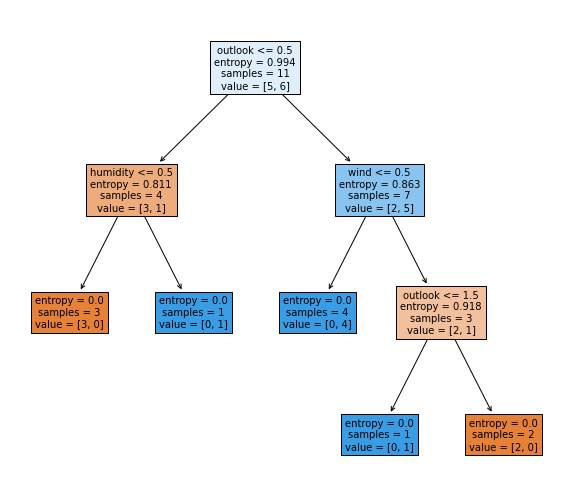

In [128]:
plt.figure(figsize=(10,9))
DTC_tree=tree.plot_tree(DTC_Model,filled=True,
                        feature_names=['outlook','temp','humidity','wind'],fontsize=10,)

In [130]:
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd

In [132]:
data=load_iris()

In [134]:
type(data)

sklearn.utils._bunch.Bunch

In [137]:
data=load_iris()
df=pd.DataFrame(data=data.data,columns=data.feature_names)

In [138]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
